<h1 style="font-size:40px;"> Poisonous OR NOT Poisonous Mushroom <h1>

# STEP 1: IMPORT DATASETS

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow 
import os
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from tensorflow.python import keras
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import tensorflow as tf

In [96]:
#This code below checks if TensorFlow is able to identify the GPU by DeepLizard
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  0


IndexError: list index out of range

In [97]:
# pic = load_img('/Users/sophie/Desktop/Mushrooms_Pictures/Test/Not_Poisonous/000_pIBnrKk4HoA.jpg')
# pic.getpixel
# pic_array = img_to_array(pic)
# pic_array.shape
# pic

In [118]:
train_path = '/Users/sophie/Desktop/Mushrooms_Pictures/Train'
valid_path = '/Users/sophie/Desktop/Mushrooms_Pictures/Validation'
test_path = '/Users/sophie/Desktop/Mushrooms_Pictures/Test'

image_gen = ImageDataGenerator(rescale= 1. /255) # create a data generator rescale= 1. /255

training_generator = image_gen.flow_from_directory(
    train_path,
    classes=['Poisonous', 'Not_Poisonous'],
    class_mode='binary',
    target_size=(256, 256),
    batch_size=1000
)
validation_generator = image_gen.flow_from_directory(
    valid_path,
    classes=['Poisonous', 'Not_Poisonous'],
    class_mode='binary',
    target_size=(256, 256),
    batch_size=200
)

test_generator = image_gen.flow_from_directory(
    test_path,
    classes=['Poisonous', 'Not_Poisonous'],
    class_mode='binary',
    target_size=(256, 256),
    batch_size=250
)

X_train, y_train = training_generator.next()
print(f'This is the X_train: Batch shape=%s, min=%.3f, max=%.3f' % (X_train.shape, X_train.min(), X_train.max()))
print(y_train)

X_validation, y_validation = validation_generator.next()
print(f'This is the X_validation: Batch shape=%s, min=%.3f, max=%.3f' % (X_validation.shape, X_validation.min(), X_validation.max()))
print(y_validation)

X_test, y_test = test_generator.next()
print(f'This is the X_test: Batch shape=%s, min=%.3f, max=%.3f' % (X_test.shape, X_test.min(), X_test.max()))
print(y_test)


Found 3599 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
Found 1343 images belonging to 2 classes.
This is the X_train: Batch shape=(1000, 256, 256, 3), min=0.000, max=1.000
[0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1.

# STEP 2: VISUALIZE DATA

In [99]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

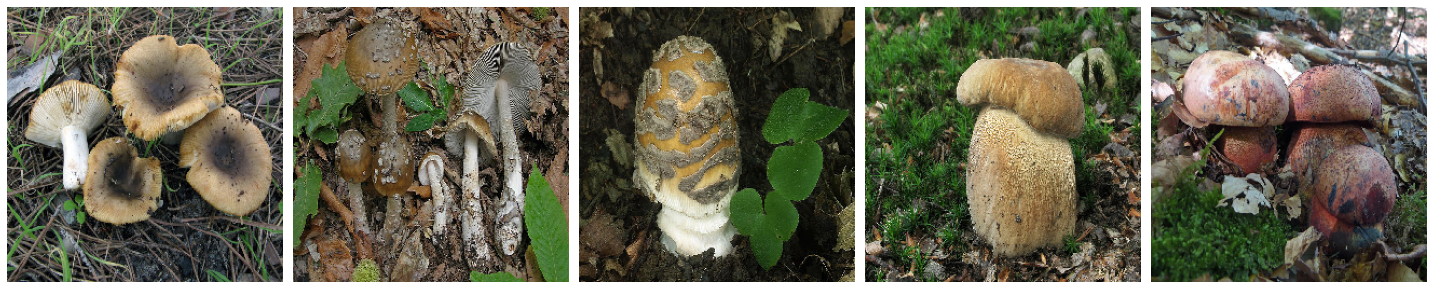

[1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1.
 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.

In [100]:
plotImages(X_train)
print(y_train)

# STEP 3: DATA PREPARATION

I am going to scale the data. 

In [87]:
X_train = X_train/X_train.max()

In [88]:
X_validation = X_validation/X_validation.max()

In [89]:
X_test = X_test/X_test.max()

In [90]:
Input_shape = X_train.shape[1:]
Input_shape

(256, 256, 3)

# STEP 4: TRAIN THE MODEL

In [101]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [102]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=Input_shape))
cnn_model.add(AveragePooling2D())
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())
cnn_model.add(Dropout(0.3))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))

cnn_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 252, 252, 6)       456       
_________________________________________________________________
average_pooling2d_17 (Averag (None, 126, 126, 6)       0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 126, 126, 6)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 122, 122, 16)      2416      
_________________________________________________________________
average_pooling2d_18 (Averag (None, 61, 61, 16)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 61, 61, 16)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 59536)           

In [103]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [80]:
history = cnn_model.fit(X_train,
                        y_train,
                        nb_epoch=50,
                        verbose=1,
                        validation_data = (X_validation,y_validation))

/anaconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 1000 samples, validate on 200 samples
Epoch 1/50
1000/1000 [==============================] - 31s 31ms/step - loss: 0.8048 - accuracy: 0.7330 - val_loss: 0.5770 - val_accuracy: 0.7450
Epoch 2/50
1000/1000 [==============================] - 31s 31ms/step - loss: 0.5275 - accuracy: 0.7760 - val_loss: 0.5965 - val_accuracy: 0.7450
Epoch 3/50
1000/1000 [==============================] - 31s 31ms/step - loss: 0.5224 - accuracy: 0.7750 - val_loss: 0.5667 - val_accuracy: 0.7400
Epoch 4/50
1000/1000 [==============================] - 31s 31ms/step - loss: 0.5049 - accuracy: 0.7810 - val_loss: 0.6005 - val_accuracy: 0.7450
Epoch 5/50
1000/1000 [==============================] - 31s 31ms/step - loss: 0.4541 - accuracy: 0.8070 - val_loss: 0.6010 - val_accuracy: 0.7400
Epoch 6/50
1000/1000 [==============================] - 31s 31ms/step - loss: 0.3890 - accuracy: 0.8300 - val_loss: 0.5933 - val_accuracy: 0.7350
Epoch 7/50
1000/1000 [==============================] - 31s 31ms/step - loss:

In [121]:
history = cnn_model.fit(X_train,
                        y_train,
                        nb_epoch=5,
                        verbose=1,
                        validation_data = (X_validation,y_validation))

/anaconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 1000 samples, validate on 200 samples
Epoch 1/5
1000/1000 [==============================] - 31s 31ms/step - loss: 0.5276 - accuracy: 0.7620 - val_loss: 0.5699 - val_accuracy: 0.7250
Epoch 2/5
1000/1000 [==============================] - 31s 31ms/step - loss: 0.4755 - accuracy: 0.7750 - val_loss: 0.5778 - val_accuracy: 0.7650
Epoch 3/5
1000/1000 [==============================] - 31s 31ms/step - loss: 0.4057 - accuracy: 0.8140 - val_loss: 0.6105 - val_accuracy: 0.6900
Epoch 4/5
1000/1000 [==============================] - 31s 31ms/step - loss: 0.3358 - accuracy: 0.8600 - val_loss: 0.6403 - val_accuracy: 0.7050
Epoch 5/5
1000/1000 [==============================] - 31s 31ms/step - loss: 0.2490 - accuracy: 0.9010 - val_loss: 0.8160 - val_accuracy: 0.6550


# STEP 5: EVALUATE THE MODEL

In [122]:
score = cnn_model.evaluate(X_test, y_test,verbose=0)

In [123]:
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.6840


In [124]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

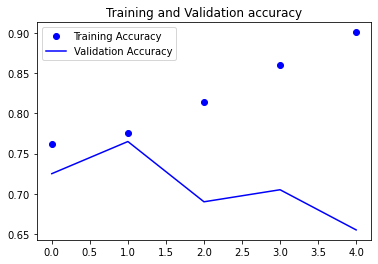

In [126]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

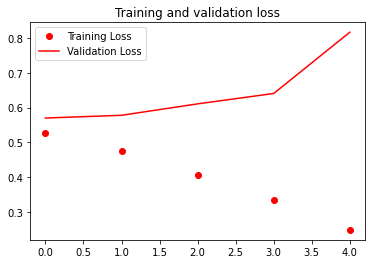

In [128]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [130]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)
#get the indices to be plotted
y_true = y_test

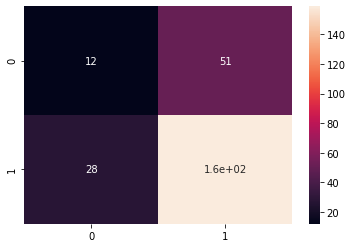

In [135]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True)

Predicted Poisonous and turns out to be poisonous (correct): 1.6e + 02 <br>
Predicted Poisonous and turns out to be not poisonous: 28 <br>
Predicted Not Poisonous and turns out to be poisonous: 51 <br>
Predicted Not Poisonous and turns out to be not poisonous(correct): 12 <br>

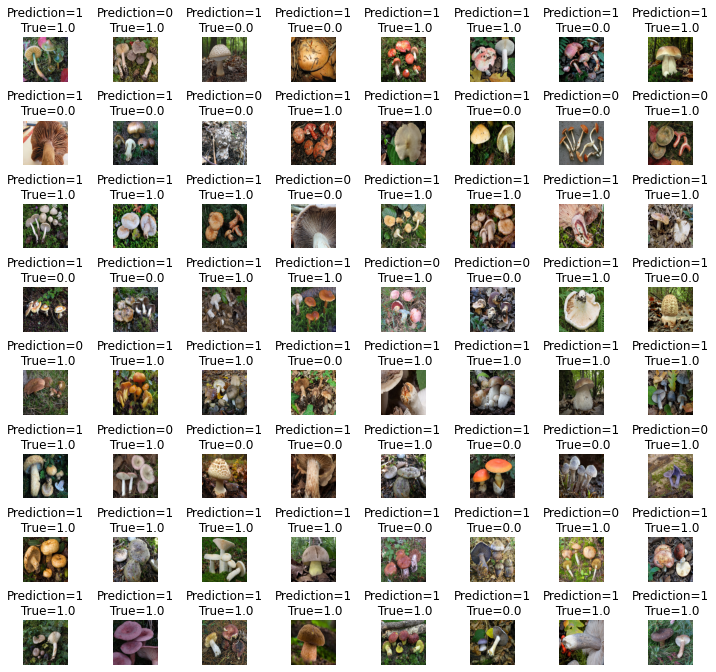

In [137]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)